# Ragged tensors

## 1. Setup

In [1]:
import math
import tensorflow as tf

# TensorFlow: Blas GEMM launch failed
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

print("The version of Tensorflow: {}".format(tf.__version__))

The version of Tensorflow: 2.4.1


## 2. Overview

### i. What you can do with a ragged tensor

In [2]:
digits = tf.ragged.constant([[3, 1, 4, 1], [], [5, 9, 2], [6], []])
words = tf.ragged.constant([["So", "long"], ["thanks", "for", "all", "the", "fish"]])
print(tf.add(digits, 3))
print(tf.reduce_mean(digits, axis=1))
print(tf.concat([digits, [[5, 3]]], axis=0))
print(tf.tile(digits, [1, 2]))
print(tf.strings.substr(words, 0, 2))
print(tf.map_fn(tf.math.square, digits))

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>
tf.Tensor([2.25              nan 5.33333333 6.                nan], shape=(5,), dtype=float64)
<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], [], [5, 3]]>
<tf.RaggedTensor [[3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], []]>
<tf.RaggedTensor [[b'So', b'lo'], [b'th', b'fo', b'al', b'th', b'fi']]>
<tf.RaggedTensor [[9, 1, 16, 1], [], [25, 81, 4], [36], []]>


In [3]:
print(digits[0])       # First row

tf.Tensor([3 1 4 1], shape=(4,), dtype=int32)


In [4]:
print(digits[:, :2])   # First two values in each row.

<tf.RaggedTensor [[3, 1], [], [5, 9], [6], []]>


In [5]:
print(digits[:, -2:])  # Last two values in each row.

<tf.RaggedTensor [[4, 1], [], [9, 2], [6], []]>


In [6]:
print(digits + 3)

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>


In [7]:
print(digits + tf.ragged.constant([[1, 2, 3, 4], [], [5, 6, 7], [8], []]))

<tf.RaggedTensor [[4, 3, 7, 5], [], [10, 15, 9], [14], []]>


In [8]:
times_two_plus_one = lambda x: x * 2 + 1
print(tf.ragged.map_flat_values(times_two_plus_one, digits))

<tf.RaggedTensor [[7, 3, 9, 3], [], [11, 19, 5], [13], []]>


In [9]:
# Ragged tensors can be converted to nested Python lists and numpy arrays:

digits.to_list()

[[3, 1, 4, 1], [], [5, 9, 2], [6], []]

In [10]:
digits.numpy()

d:\miniconda\install\lib\site-packages\tensorflow\python\ops\ragged\ragged_tensor.py:2012: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(rows)


array([array([3, 1, 4, 1]), array([], dtype=int32), array([5, 9, 2]),
       array([6]), array([], dtype=int32)], dtype=object)

### ii. Constructing a ragged tensor

In [11]:
sentences = tf.ragged.constant([
    ["Let's", "build", "some", "ragged", "tensors", "!"],
    ["We", "can", "use", "tf.ragged.constant", "."]])
print(sentences)

<tf.RaggedTensor [[b"Let's", b'build', b'some', b'ragged', b'tensors', b'!'], [b'We', b'can', b'use', b'tf.ragged.constant', b'.']]>


In [12]:
paragraphs = tf.ragged.constant([
    [['I', 'have', 'a', 'cat'], ['His', 'name', 'is', 'Mat']],
    [['Do', 'you', 'want', 'to', 'come', 'visit'], ["I'm", 'free', 'tomorrow']],
])
print(paragraphs)

<tf.RaggedTensor [[[b'I', b'have', b'a', b'cat'], [b'His', b'name', b'is', b'Mat']], [[b'Do', b'you', b'want', b'to', b'come', b'visit'], [b"I'm", b'free', b'tomorrow']]]>


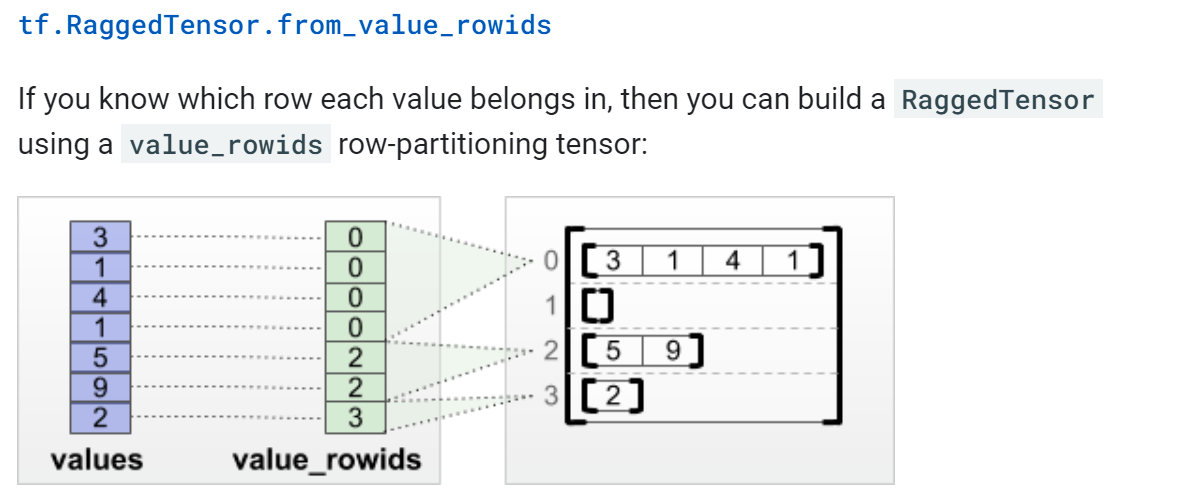

In [13]:
from IPython.display import Image, display
display(Image(filename="./image/ragged.png", embed=True))

In [14]:
print(tf.RaggedTensor.from_row_lengths(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_lengths=[4, 0, 2, 1]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


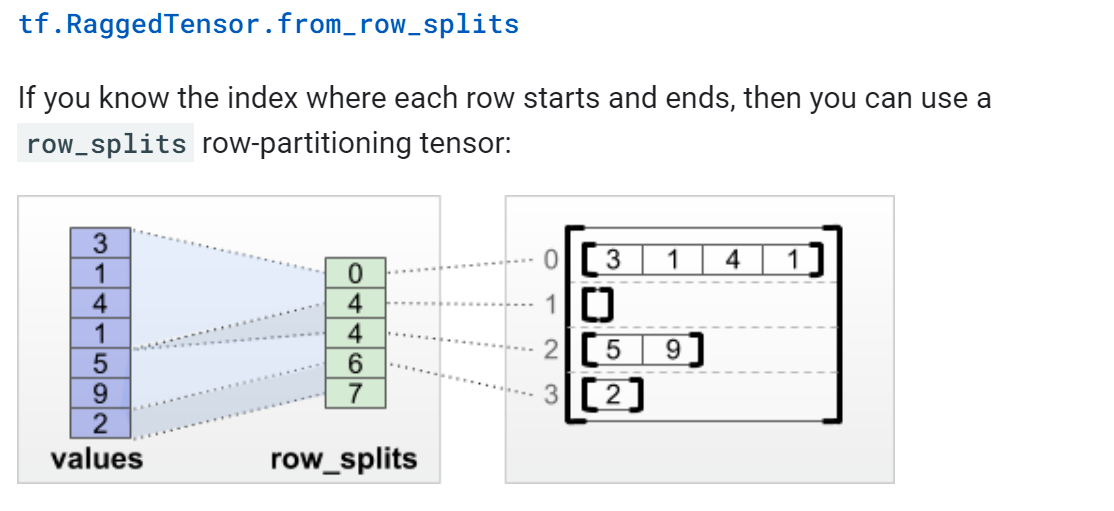

In [15]:
from IPython.display import Image, display
display(Image(filename="./image/ragged2.png", embed=True))

In [16]:
print(tf.RaggedTensor.from_row_splits(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_splits=[0, 4, 4, 6, 7]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


### iii. What you can store in a ragged tensor

In [17]:
print(tf.ragged.constant([["Hi"], ["How", "are", "you"]]))  # ok: type=string, rank=2

<tf.RaggedTensor [[b'Hi'], [b'How', b'are', b'you']]>


In [18]:
print(tf.ragged.constant([[[1, 2], [3]], [[4, 5]]]))        # ok: type=int32, rank=3

<tf.RaggedTensor [[[1, 2], [3]], [[4, 5]]]>


In [19]:
try:
  tf.ragged.constant([["one", "two"], [3, 4]])              # bad: multiple types
except ValueError as exception:
  print(exception)

Can't convert Python sequence with mixed types to Tensor.


In [20]:
try:
  tf.ragged.constant(["A", ["B", "C"]])                     # bad: multiple nesting depths
except ValueError as exception:
  print(exception)

all scalar values must have the same nesting depth


## 3. Example use case

In [21]:
queries = tf.ragged.constant([['Who', 'is', 'Dan', 'Smith'],
                              ['Pause'],
                              ['Will', 'it', 'rain', 'later', 'today']])

# Create an embedding table.
num_buckets = 1024
embedding_size = 4
embedding_table = tf.Variable(
    tf.random.truncated_normal([num_buckets, embedding_size],
                       stddev=1.0 / math.sqrt(embedding_size)))

# Look up the embedding for each word.
word_buckets = tf.strings.to_hash_bucket_fast(queries, num_buckets)
word_embeddings = tf.nn.embedding_lookup(embedding_table, word_buckets)     # ①

# Add markers to the beginning and end of each sentence.
marker = tf.fill([queries.nrows(), 1], '#')
padded = tf.concat([marker, queries, marker], axis=1)                       # ②

# Build word bigrams & look up embeddings.
bigrams = tf.strings.join([padded[:, :-1], padded[:, 1:]], separator='+')   # ③

bigram_buckets = tf.strings.to_hash_bucket_fast(bigrams, num_buckets)
bigram_embeddings = tf.nn.embedding_lookup(embedding_table, bigram_buckets) # ④

# Find the average embedding for each sentence
all_embeddings = tf.concat([word_embeddings, bigram_embeddings], axis=1)    # ⑤
avg_embedding = tf.reduce_mean(all_embeddings, axis=1)                      # ⑥
print(avg_embedding)

tf.Tensor(
[[-0.0241357   0.2146032  -0.04987775 -0.4986256 ]
 [ 0.19005923 -0.2821296   0.01699745 -0.65130436]
 [ 0.17116007  0.0147101   0.09804396 -0.08509406]], shape=(3, 4), dtype=float32)


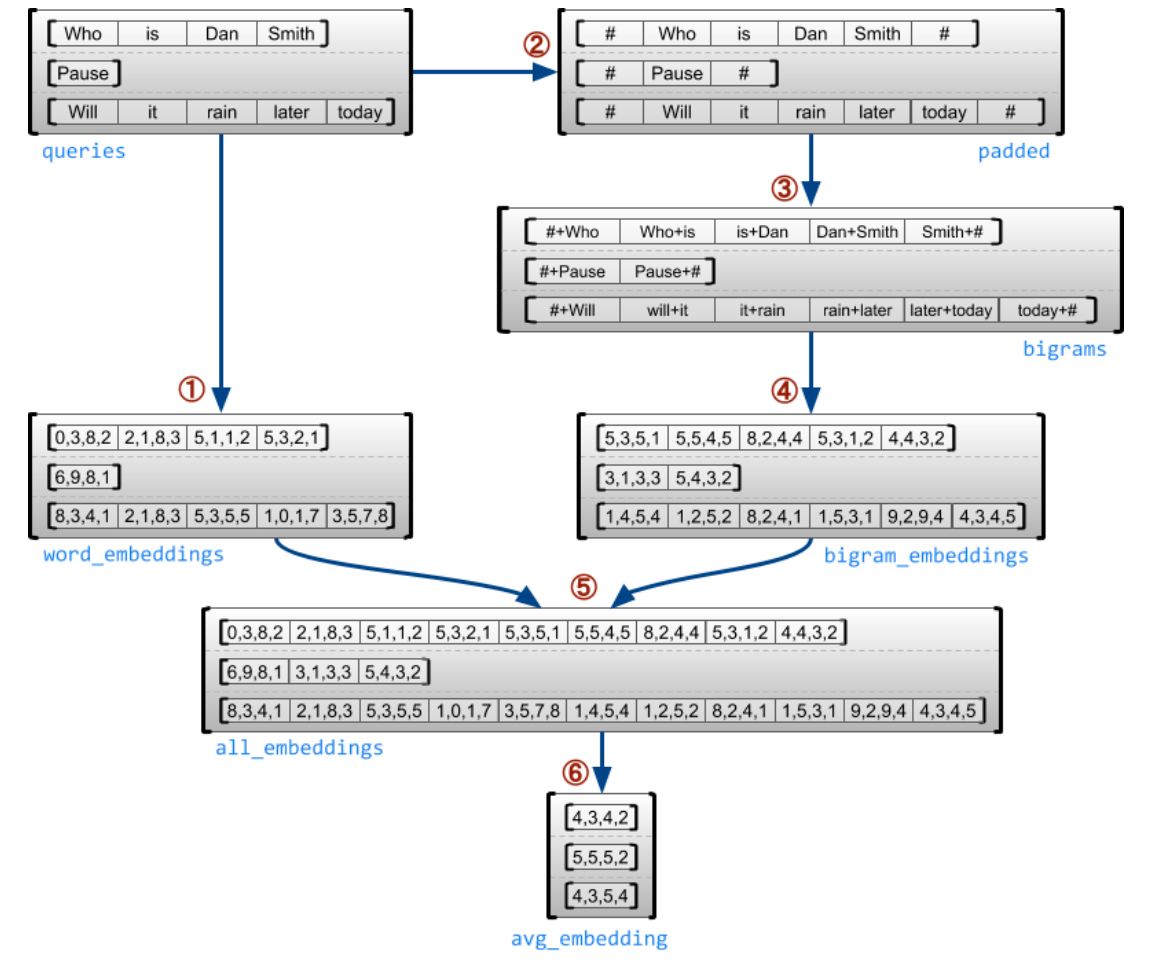

In [22]:
from IPython.display import Image, display
display(Image(filename="./image/raggedExp.png", embed=True))

## 4. Ragged and uniform dimensions

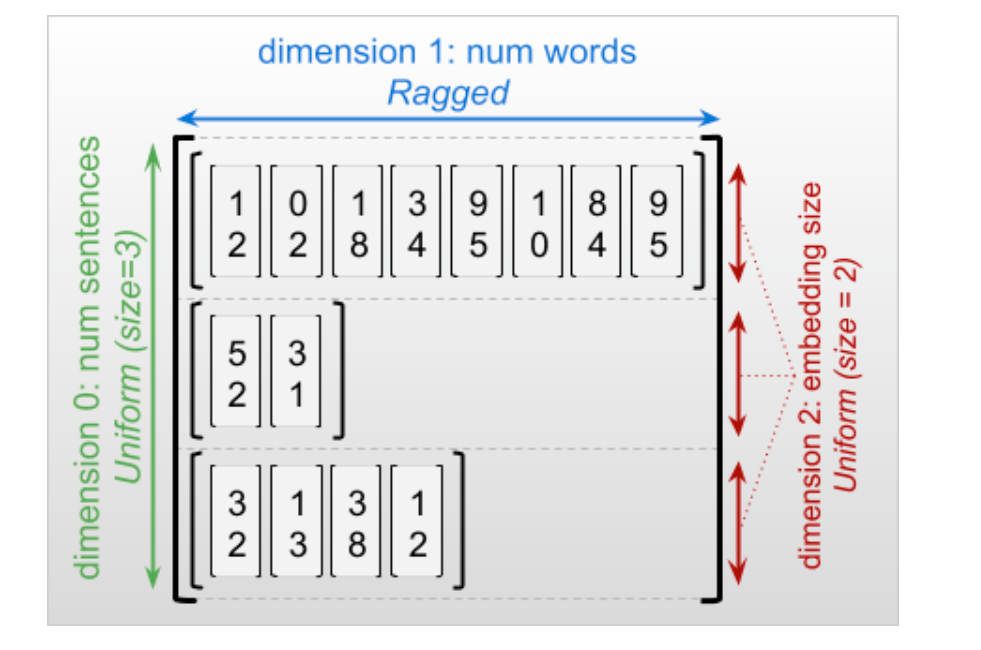

In [23]:
from IPython.display import Image, display
display(Image(filename="./image/raggedExp2.png", embed=True))

In [24]:
# The RaggedTensor.shape attribute returns a tf.TensorShape for a ragged tensor, where ragged dimensions have size None:

tf.ragged.constant([["Hi"], ["How", "are", "you"]]).shape

TensorShape([2, None])

In [25]:
# The method tf.RaggedTensor.bounding_shape can be used to find a tight bounding shape for a given RaggedTensor:

print(tf.ragged.constant([["Hi"], ["How", "are", "you"]]).bounding_shape())

tf.Tensor([2 3], shape=(2,), dtype=int64)


## 5. Ragged vs. sparse

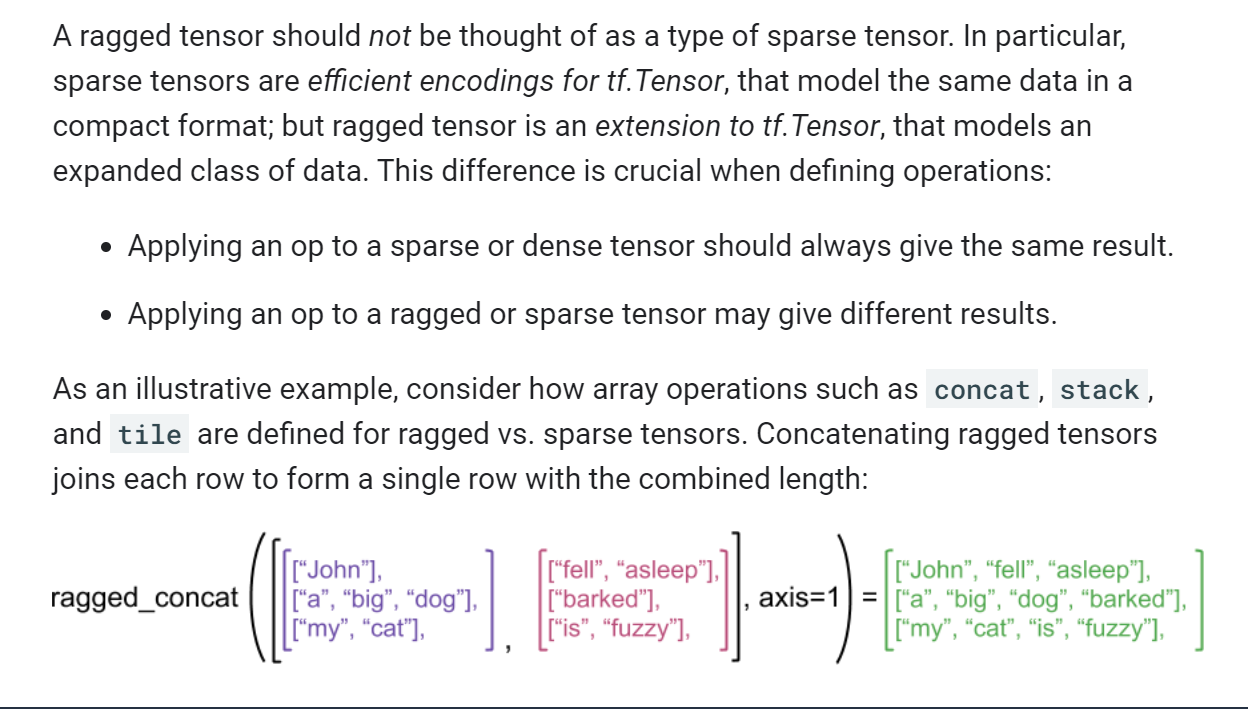

In [26]:
from IPython.display import Image, display
display(Image(filename="./image/raggedSparse.png", embed=True))

In [27]:
ragged_x = tf.ragged.constant([["John"], ["a", "big", "dog"], ["my", "cat"]])
ragged_y = tf.ragged.constant([["fell", "asleep"], ["barked"], ["is", "fuzzy"]])
print(tf.concat([ragged_x, ragged_y], axis=1))

<tf.RaggedTensor [[b'John', b'fell', b'asleep'], [b'a', b'big', b'dog', b'barked'], [b'my', b'cat', b'is', b'fuzzy']]>


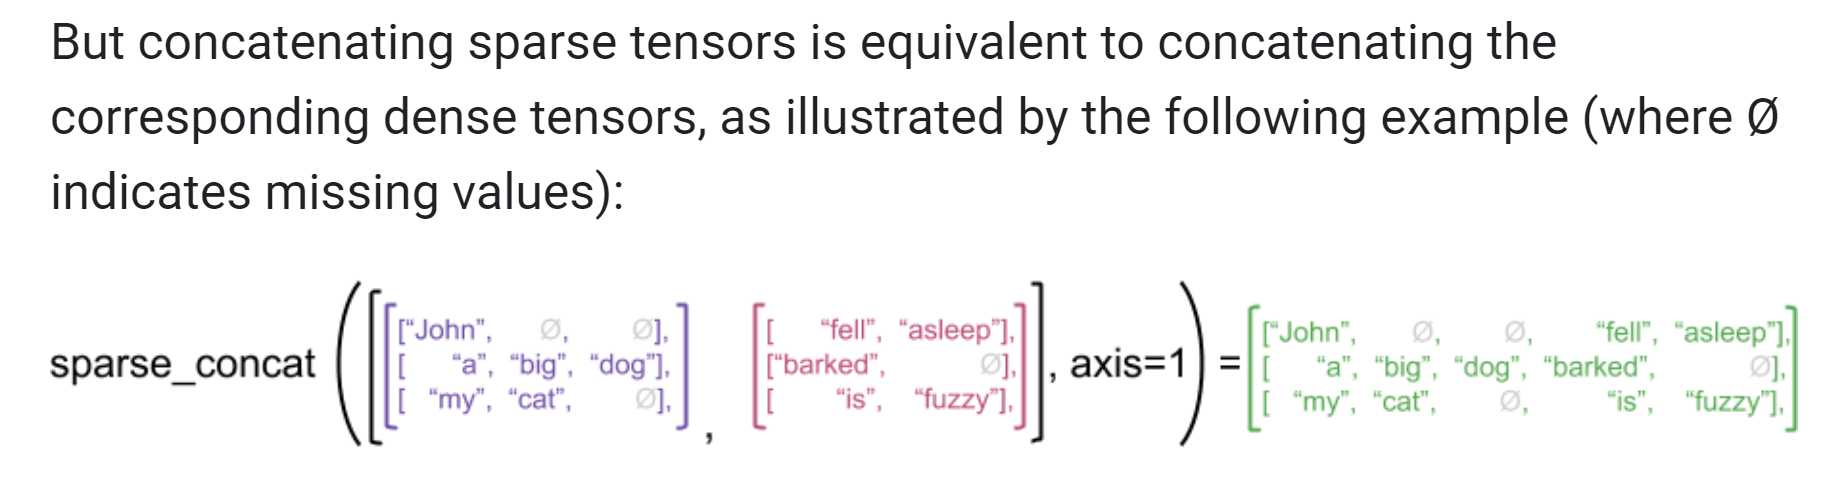

In [28]:
from IPython.display import Image, display
display(Image(filename="./image/raggedSparse2.png", embed=True))

In [29]:
sparse_x = ragged_x.to_sparse()
sparse_y = ragged_y.to_sparse()
sparse_result = tf.sparse.concat(sp_inputs=[sparse_x, sparse_y], axis=1)
print(tf.sparse.to_dense(sparse_result, ''))

tf.Tensor(
[[b'John' b'' b'' b'fell' b'asleep']
 [b'a' b'big' b'dog' b'barked' b'']
 [b'my' b'cat' b'' b'is' b'fuzzy']], shape=(3, 5), dtype=string)


## 6. TensorFlow APIs

### i. Keras

In [30]:
# Task: predict whether each sentence is a question or not.
sentences = tf.constant(
    ['What makes you think she is a witch?',
     'She turned me into a newt.',
     'A newt?',
     'Well, I got better.'])
is_question = tf.constant([True, False, True, False])

# Preprocess the input strings.
hash_buckets = 1000
words = tf.strings.split(sentences, ' ')
hashed_words = tf.strings.to_hash_bucket_fast(words, hash_buckets)

# Build the Keras model.
keras_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[None], dtype=tf.int64, ragged=True),
    tf.keras.layers.Embedding(hash_buckets, 16),
    tf.keras.layers.LSTM(32, use_bias=False),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.Dense(1)
])

keras_model.compile(loss='binary_crossentropy', optimizer='rmsprop')
keras_model.fit(hashed_words, is_question, epochs=5)
print(keras_model.predict(hashed_words))

Epoch 1/5


d:\miniconda\install\lib\site-packages\tensorflow\python\framework\indexed_slices.py:435: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/boolean_mask_1/GatherV2:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/boolean_mask/GatherV2:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/Shape:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1/1 [==============================] - 2s 2s/step - loss: 5.3111
Epoch 2/5
1/1 [==============================] - 0s 35ms/step - loss: 2.4124
Epoch 3/5
1/1 [==============================] - 0s 36ms/step - loss: 1.9749
Epoch 4/5
1/1 [==============================] - 0s 34ms/step - loss: 1.8746
Epoch 5/5
1/1 [==============================] - 0s 33ms/step - loss: 1.8092
[[0.03874848]
 [0.02260526]
 [0.02371956]
 [0.00973994]]


### ii. tf.Example

In [31]:
import google.protobuf.text_format as pbtext

def build_tf_example(s):
  return pbtext.Merge(s, tf.train.Example()).SerializeToString()

example_batch = [
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["red", "blue"]} } }
      feature {key: "lengths" value {int64_list {value: [7]} } } }'''),
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["orange"]} } }
      feature {key: "lengths" value {int64_list {value: []} } } }'''),
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["black", "yellow"]} } }
      feature {key: "lengths" value {int64_list {value: [1, 3]} } } }'''),
  build_tf_example(r'''
    features {
      feature {key: "colors" value {bytes_list {value: ["green"]} } }
      feature {key: "lengths" value {int64_list {value: [3, 5, 2]} } } }''')]

In [32]:
feature_specification = {
    'colors': tf.io.RaggedFeature(tf.string),
    'lengths': tf.io.RaggedFeature(tf.int64),
}
feature_tensors = tf.io.parse_example(example_batch, feature_specification)
for name, value in feature_tensors.items():
  print("{}={}".format(name, value))

colors=<tf.RaggedTensor [[b'red', b'blue'], [b'orange'], [b'black', b'yellow'], [b'green']]>
lengths=<tf.RaggedTensor [[7], [], [1, 3], [3, 5, 2]]>


### iii. Datasets

In [33]:
# Helper function used to print datasets in the examples below.
def print_dictionary_dataset(dataset):
  for i, element in enumerate(dataset):
    print("Element {}:".format(i))
    for (feature_name, feature_value) in element.items():
      print('{:>14} = {}'.format(feature_name, feature_value))

### Building Datasets with ragged tensors

In [34]:
dataset = tf.data.Dataset.from_tensor_slices(feature_tensors)
print_dictionary_dataset(dataset)

Element 0:
        colors = [b'red' b'blue']
       lengths = [7]
Element 1:
        colors = [b'orange']
       lengths = []
Element 2:
        colors = [b'black' b'yellow']
       lengths = [1 3]
Element 3:
        colors = [b'green']
       lengths = [3 5 2]


### Batching and unbatching Datasets with ragged tensors

In [35]:
batched_dataset = dataset.batch(2)
print_dictionary_dataset(batched_dataset)

Element 0:
        colors = <tf.RaggedTensor [[b'red', b'blue'], [b'orange']]>
       lengths = <tf.RaggedTensor [[7], []]>
Element 1:
        colors = <tf.RaggedTensor [[b'black', b'yellow'], [b'green']]>
       lengths = <tf.RaggedTensor [[1, 3], [3, 5, 2]]>


In [36]:
unbatched_dataset = batched_dataset.unbatch()
print_dictionary_dataset(unbatched_dataset)

Element 0:
        colors = [b'red' b'blue']
       lengths = [7]
Element 1:
        colors = [b'orange']
       lengths = []
Element 2:
        colors = [b'black' b'yellow']
       lengths = [1 3]
Element 3:
        colors = [b'green']
       lengths = [3 5 2]


### Batching Datasets with variable-length non-ragged tensors

In [37]:
non_ragged_dataset = tf.data.Dataset.from_tensor_slices([1, 5, 3, 2, 8])
non_ragged_dataset = non_ragged_dataset.map(tf.range)
batched_non_ragged_dataset = non_ragged_dataset.apply(
    tf.data.experimental.dense_to_ragged_batch(2))
for element in batched_non_ragged_dataset:
  print(element)

<tf.RaggedTensor [[0], [0, 1, 2, 3, 4]]>
<tf.RaggedTensor [[0, 1, 2], [0, 1]]>
<tf.RaggedTensor [[0, 1, 2, 3, 4, 5, 6, 7]]>


### Transforming Datasets with ragged tensors

In [38]:
def transform_lengths(features):
  return {
      'mean_length': tf.math.reduce_mean(features['lengths']),
      'length_ranges': tf.ragged.range(features['lengths'])}
transformed_dataset = dataset.map(transform_lengths)
print_dictionary_dataset(transformed_dataset)

Element 0:
   mean_length = 7
 length_ranges = <tf.RaggedTensor [[0, 1, 2, 3, 4, 5, 6]]>
Element 1:
   mean_length = 0
 length_ranges = <tf.RaggedTensor []>
Element 2:
   mean_length = 2
 length_ranges = <tf.RaggedTensor [[0], [0, 1, 2]]>
Element 3:
   mean_length = 3
 length_ranges = <tf.RaggedTensor [[0, 1, 2], [0, 1, 2, 3, 4], [0, 1]]>


### iv. tf.function

In [39]:
@tf.function
def make_palindrome(x, axis):
  return tf.concat([x, tf.reverse(x, [axis])], axis)

In [40]:
make_palindrome(tf.constant([[1, 2], [3, 4], [5, 6]]), axis=1)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 2, 1],
       [3, 4, 4, 3],
       [5, 6, 6, 5]])>

In [41]:
make_palindrome(tf.ragged.constant([[1, 2], [3], [4, 5, 6]]), axis=1)

<tf.RaggedTensor [[1, 2, 2, 1], [3, 3], [4, 5, 6, 6, 5, 4]]>

In [42]:
@tf.function(
    input_signature=[tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32)])
def max_and_min(rt):
  return (tf.math.reduce_max(rt, axis=-1), tf.math.reduce_min(rt, axis=-1))

max_and_min(tf.ragged.constant([[1, 2], [3], [4, 5, 6]]))

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 6])>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 3, 4])>)

### Concrete functions

In [43]:
@tf.function
def increment(x):
  return x + 1

rt = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
cf = increment.get_concrete_function(rt)
print(cf(rt))

<tf.RaggedTensor [[2, 3], [4], [5, 6, 7]]>


### v. SavedModels

### Example: saving a Keras model

In [44]:
import tempfile

keras_module_path = tempfile.mkdtemp()
tf.saved_model.save(keras_model, keras_module_path)
imported_model = tf.saved_model.load(keras_module_path)
imported_model(hashed_words)

INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmp5e410jar\assets


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.03874848],
       [0.02260526],
       [0.02371956],
       [0.00973994]], dtype=float32)>

### Example: saving a custom model

In [45]:
class CustomModule(tf.Module):
  def __init__(self, variable_value):
    super(CustomModule, self).__init__()
    self.v = tf.Variable(variable_value)

  @tf.function
  def grow(self, x):
    return x * self.v

module = CustomModule(100.0)

# Before saving a custom model, we must ensure that concrete functions are
# built for each input signature that we will need.
module.grow.get_concrete_function(tf.RaggedTensorSpec(shape=[None, None],
                                                      dtype=tf.float32))

custom_module_path = tempfile.mkdtemp()
tf.saved_model.save(module, custom_module_path)
imported_model = tf.saved_model.load(custom_module_path)
imported_model.grow(tf.ragged.constant([[1.0, 4.0, 3.0], [2.0]]))

INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmptzoelu5b\assets


<tf.RaggedTensor [[100.0, 400.0, 300.0], [200.0]]>

## 7. Overloaded operators

In [46]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
y = tf.ragged.constant([[1, 1], [2], [3, 3, 3]])
print(x + y)

<tf.RaggedTensor [[2, 3], [5], [7, 8, 9]]>


In [47]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
print(x + 3)

<tf.RaggedTensor [[4, 5], [6], [7, 8, 9]]>


## 8. Indexing

### i. Indexing examples: 2D ragged tensor

In [48]:
queries = tf.ragged.constant(
    [['Who', 'is', 'George', 'Washington'],
     ['What', 'is', 'the', 'weather', 'tomorrow'],
     ['Goodnight']])

In [49]:
print(queries[1])                   # A single query

tf.Tensor([b'What' b'is' b'the' b'weather' b'tomorrow'], shape=(5,), dtype=string)


In [50]:
print(queries[1, 2])                # A single word

tf.Tensor(b'the', shape=(), dtype=string)


In [52]:
print(queries[1:])                  # Everything but the first row

<tf.RaggedTensor [[b'What', b'is', b'the', b'weather', b'tomorrow'], [b'Goodnight']]>


In [54]:
print(queries[:, :3])               # The first 3 words of each query

<tf.RaggedTensor [[b'Who', b'is', b'George'], [b'What', b'is', b'the'], [b'Goodnight']]>


In [55]:
print(queries[:, -2:])              # The last 2 words of each query

<tf.RaggedTensor [[b'George', b'Washington'], [b'weather', b'tomorrow'], [b'Goodnight']]>


### ii. Indexing examples 3D ragged tensor

In [56]:
rt = tf.ragged.constant([[[1, 2, 3], [4]],
                         [[5], [], [6]],
                         [[7]],
                         [[8, 9], [10]]])

In [57]:
print(rt[1])                        # Second row (2-D RaggedTensor)

<tf.RaggedTensor [[5], [], [6]]>


In [58]:
print(rt[3, 0])                     # First element of fourth row (1-D Tensor)

tf.Tensor([8 9], shape=(2,), dtype=int32)


In [59]:
print(rt[:, 1:3])                   # Items 1-3 of each row (3-D RaggedTensor)

<tf.RaggedTensor [[[4]], [[], [6]], [], [[10]]]>


In [60]:
print(rt[:, -1:])                   # Last item of each row (3-D RaggedTensor)

<tf.RaggedTensor [[[4]], [[6]], [[7]], [[10]]]>


## 9. Tensor type conversion

In [61]:
ragged_sentences = tf.ragged.constant([
    ['Hi'], ['Welcome', 'to', 'the', 'fair'], ['Have', 'fun']])

In [62]:
# RaggedTensor -> Tensor
print(ragged_sentences.to_tensor(default_value='', shape=[None, 10]))

tf.Tensor(
[[b'Hi' b'' b'' b'' b'' b'' b'' b'' b'' b'']
 [b'Welcome' b'to' b'the' b'fair' b'' b'' b'' b'' b'' b'']
 [b'Have' b'fun' b'' b'' b'' b'' b'' b'' b'' b'']], shape=(3, 10), dtype=string)


In [63]:
# Tensor -> RaggedTensor
x = [[1, 3, -1, -1], [2, -1, -1, -1], [4, 5, 8, 9]]
print(tf.RaggedTensor.from_tensor(x, padding=-1))

<tf.RaggedTensor [[1, 3], [2], [4, 5, 8, 9]]>


In [64]:
#RaggedTensor -> SparseTensor
print(ragged_sentences.to_sparse())

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]], shape=(7, 2), dtype=int64), values=tf.Tensor([b'Hi' b'Welcome' b'to' b'the' b'fair' b'Have' b'fun'], shape=(7,), dtype=string), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [65]:
# SparseTensor -> RaggedTensor
st = tf.SparseTensor(indices=[[0, 0], [2, 0], [2, 1]],
                     values=['a', 'b', 'c'],
                     dense_shape=[3, 3])
print(tf.RaggedTensor.from_sparse(st))

<tf.RaggedTensor [[b'a'], [], [b'b', b'c']]>


## 10. Evaluating ragged tensors

In [66]:
rt = tf.ragged.constant([[1, 2], [3, 4, 5], [6], [], [7]])
print("python list:", rt.to_list())
print("numpy array:", rt.numpy())
print("values:", rt.values.numpy())
print("splits:", rt.row_splits.numpy())
print("indexed value:", rt[1].numpy())

python list: [[1, 2], [3, 4, 5], [6], [], [7]]
numpy array: [array([1, 2]) array([3, 4, 5]) array([6]) array([], dtype=int32)
 array([7])]
values: [1 2 3 4 5 6 7]
splits: [0 2 5 6 6 7]


d:\miniconda\install\lib\site-packages\tensorflow\python\ops\ragged\ragged_tensor.py:2012: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(rows)


indexed value: [3 4 5]


## 11. Broadcasting

### Broadcasting examples

In [67]:
# x       (2D ragged):  2 x (num_rows)
# y       (scalar)
# result  (2D ragged):  2 x (num_rows)
x = tf.ragged.constant([[1, 2], [3]])
y = 3
print(x + y)

<tf.RaggedTensor [[4, 5], [6]]>


In [68]:
# x         (2d ragged):  3 x (num_rows)
# y         (2d tensor):  3 x          1
# Result    (2d ragged):  3 x (num_rows)
x = tf.ragged.constant(
   [[10, 87, 12],
    [19, 53],
    [12, 32]])
y = [[1000], [2000], [3000]]
print(x + y)

<tf.RaggedTensor [[1010, 1087, 1012], [2019, 2053], [3012, 3032]]>


In [69]:
# x      (3d ragged):  2 x (r1) x 2
# y      (2d ragged):         1 x 1
# Result (3d ragged):  2 x (r1) x 2
x = tf.ragged.constant(
    [[[1, 2], [3, 4], [5, 6]],
     [[7, 8]]],
    ragged_rank=1)
y = tf.constant([[10]])
print(x + y)

<tf.RaggedTensor [[[11, 12], [13, 14], [15, 16]], [[17, 18]]]>


In [70]:
# x      (3d ragged):  2 x (r1) x (r2) x 1
# y      (1d tensor):                    3
# Result (3d ragged):  2 x (r1) x (r2) x 3
x = tf.ragged.constant(
    [
        [
            [[1], [2]],
            [],
            [[3]],
            [[4]],
        ],
        [
            [[5], [6]],
            [[7]]
        ]
    ],
    ragged_rank=2)
y = tf.constant([10, 20, 30])
print(x + y)

<tf.RaggedTensor [[[[11, 21, 31], [12, 22, 32]], [], [[13, 23, 33]], [[14, 24, 34]]], [[[15, 25, 35], [16, 26, 36]], [[17, 27, 37]]]]>


In [71]:
# Here are some examples of shapes that do not broadcast:

# x      (2d ragged): 3 x (r1)
# y      (2d tensor): 3 x    4  # trailing dimensions do not match
x = tf.ragged.constant([[1, 2], [3, 4, 5, 6], [7]])
y = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
try:
  x + y
except tf.errors.InvalidArgumentError as exception:
  print(exception)

Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to broadcast: dimension size mismatch in dimension'
1
b'lengths='
4
b'dim_size='
2, 4, 1


In [72]:
# x      (2d ragged): 3 x (r1)
# y      (2d ragged): 3 x (r2)  # ragged dimensions do not match.
x = tf.ragged.constant([[1, 2, 3], [4], [5, 6]])
y = tf.ragged.constant([[10, 20], [30, 40], [50]])
try:
  x + y
except tf.errors.InvalidArgumentError as exception:
  print(exception)

Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to broadcast: dimension size mismatch in dimension'
1
b'lengths='
2, 2, 1
b'dim_size='
3, 1, 2


In [73]:
# x      (3d ragged): 3 x (r1) x 2
# y      (3d ragged): 3 x (r1) x 3  # trailing dimensions do not match
x = tf.ragged.constant([[[1, 2], [3, 4], [5, 6]],
                        [[7, 8], [9, 10]]])
y = tf.ragged.constant([[[1, 2, 0], [3, 4, 0], [5, 6, 0]],
                        [[7, 8, 0], [9, 10, 0]]])
try:
  x + y
except tf.errors.InvalidArgumentError as exception:
  print(exception)

Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to broadcast: dimension size mismatch in dimension'
2
b'lengths='
3, 3, 3, 3, 3
b'dim_size='
2, 2, 2, 2, 2


## 12. RaggedTensor encoding

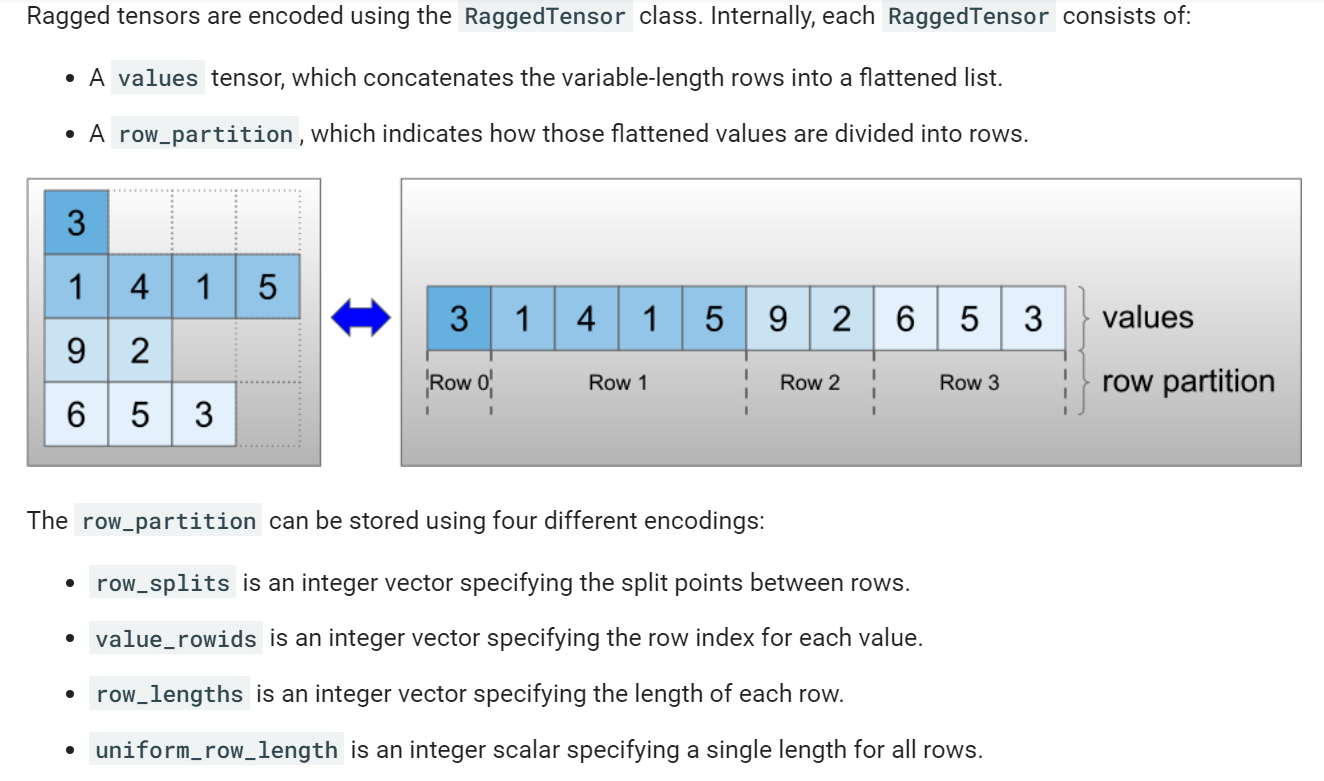

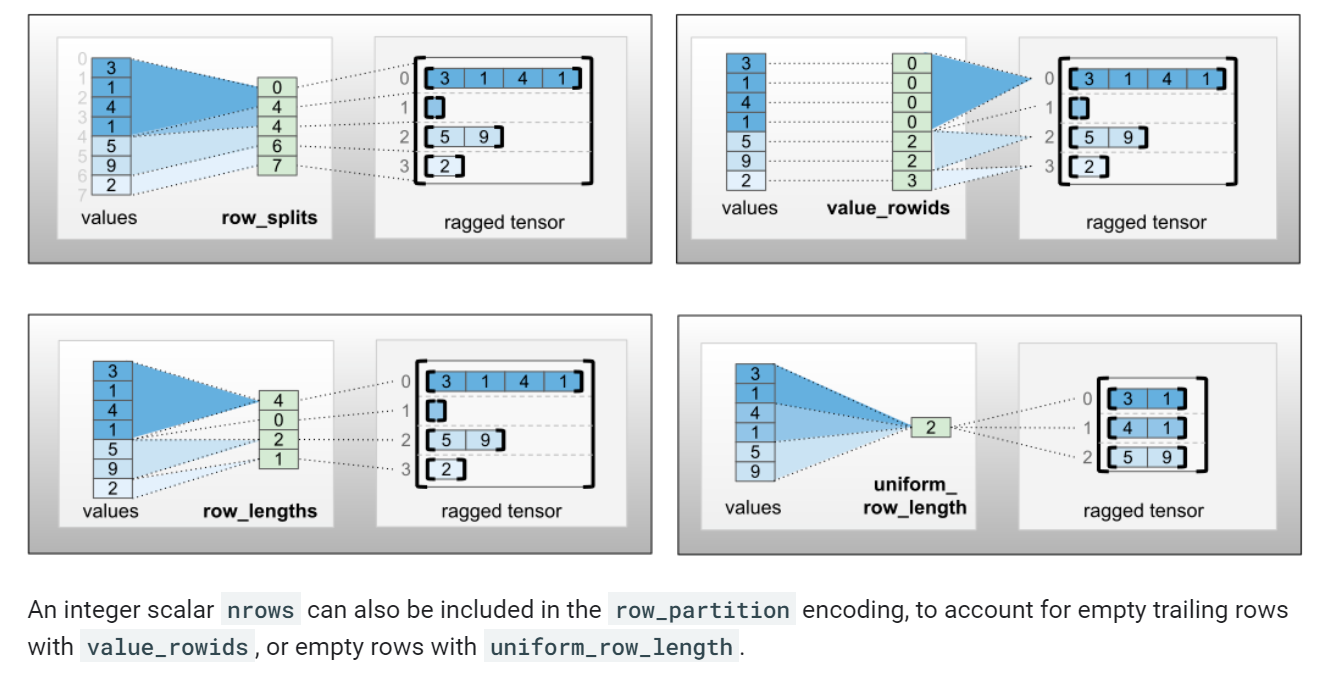

In [75]:
from IPython.display import Image, display
display(Image(filename="./image/raggedEncoding.png", embed=True))
display(Image(filename="./image/raggedEncoding2.png", embed=True))

In [76]:
rt = tf.RaggedTensor.from_row_splits(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_splits=[0, 4, 4, 6, 7])
print(rt)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


### i. Multiple ragged dimensions

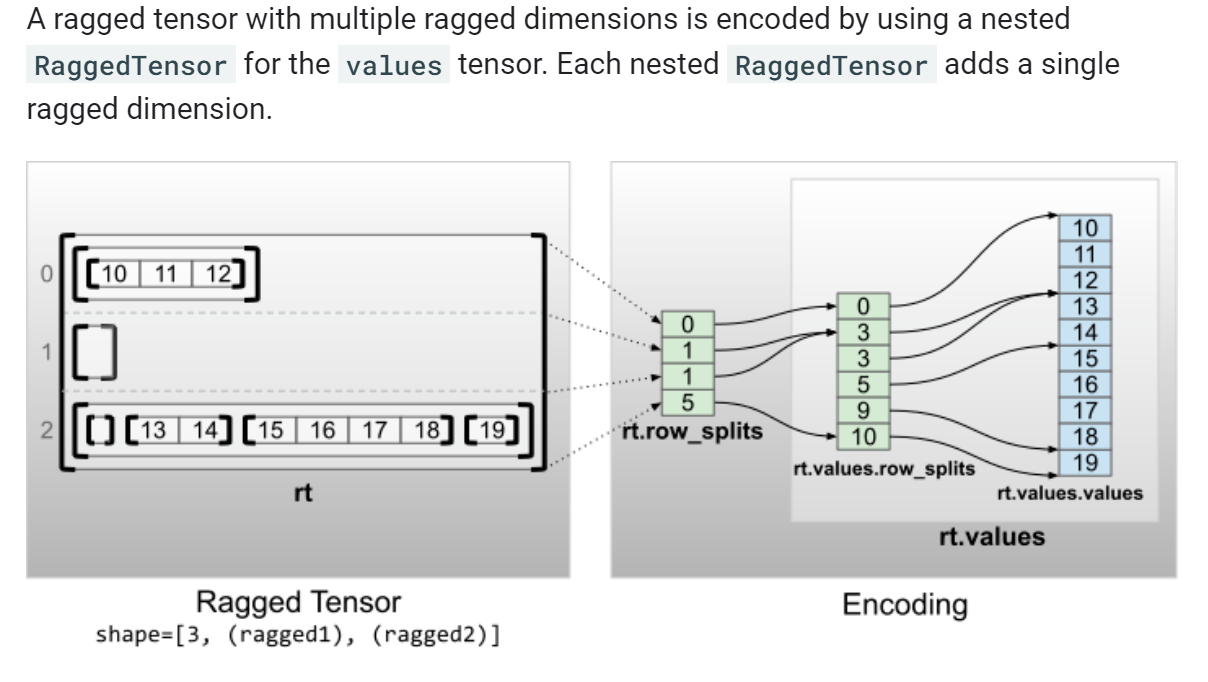

In [77]:
from IPython.display import Image, display
display(Image(filename="./image/raggedDim.png", embed=True))

In [78]:
rt = tf.RaggedTensor.from_row_splits(
    values=tf.RaggedTensor.from_row_splits(
        values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        row_splits=[0, 3, 3, 5, 9, 10]),
    row_splits=[0, 1, 1, 5])
print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>
Shape: (3, None, None)
Number of partitioned dimensions: 2


In [79]:
rt = tf.RaggedTensor.from_nested_row_splits(
    flat_values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    nested_row_splits=([0, 1, 1, 5], [0, 3, 3, 5, 9, 10]))
print(rt)

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>


### ii. Ragged rank and flat values

In [80]:
# shape = [batch, (paragraph), (sentence), (word)]
conversations = tf.ragged.constant(
    [[[["I", "like", "ragged", "tensors."]],
      [["Oh", "yeah?"], ["What", "can", "you", "use", "them", "for?"]],
      [["Processing", "variable", "length", "data!"]]],
     [[["I", "like", "cheese."], ["Do", "you?"]],
      [["Yes."], ["I", "do."]]]])
conversations.shape

TensorShape([2, None, None, None])

In [81]:
assert conversations.ragged_rank == len(conversations.nested_row_splits)
conversations.ragged_rank  # Number of partitioned dimensions.

3

In [82]:
conversations.flat_values.numpy()

array([b'I', b'like', b'ragged', b'tensors.', b'Oh', b'yeah?', b'What',
       b'can', b'you', b'use', b'them', b'for?', b'Processing',
       b'variable', b'length', b'data!', b'I', b'like', b'cheese.', b'Do',
       b'you?', b'Yes.', b'I', b'do.'], dtype=object)

### iii. Uniform inner dimensions

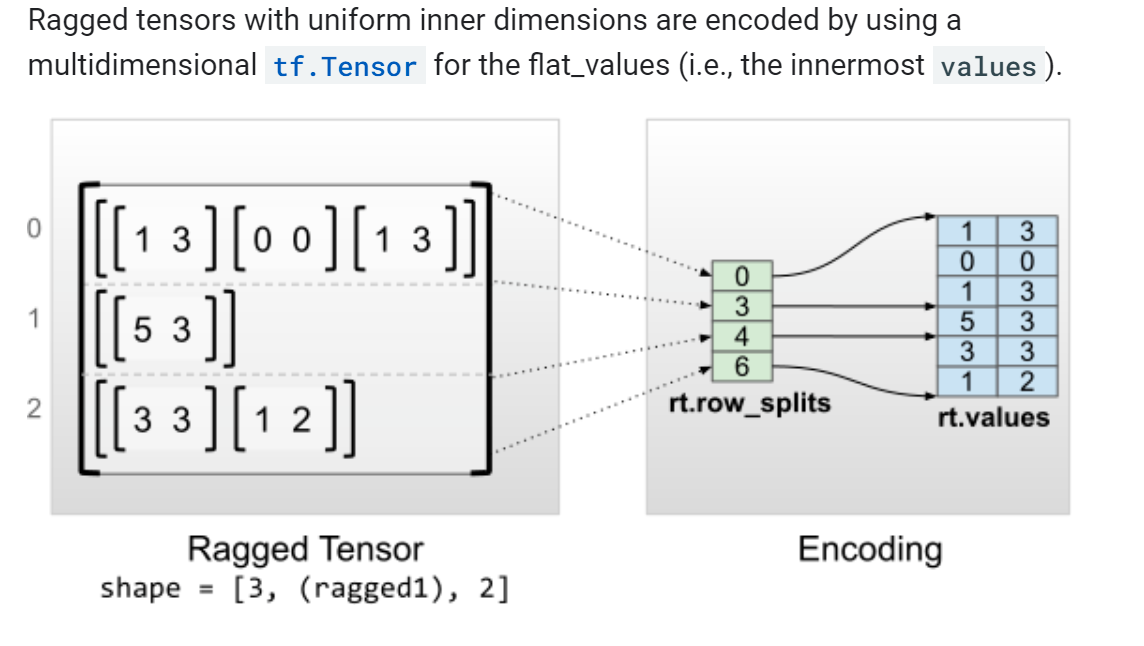

In [83]:
from IPython.display import Image, display
display(Image(filename="./image/raggedDims.png", embed=True))

In [84]:
rt = tf.RaggedTensor.from_uniform_row_length(
    values=tf.RaggedTensor.from_row_splits(
        values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        row_splits=[0, 3, 5, 9, 10]),
    uniform_row_length=2)
print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

<tf.RaggedTensor [[[10, 11, 12], [13, 14]], [[15, 16, 17, 18], [19]]]>
Shape: (2, 2, None)
Number of partitioned dimensions: 2


# reference

### https://tensorflow.google.cn/guide/ragged_tensor